In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [6]:
def model_svm(x_train, y_train, x_test):
    cs = SVC(kernel = 'linear', random_state = 0)
    cs.fit(x_train, y_train)
    y_pred = cs.predict(x_test)
    return y_pred, cs

In [13]:
#plotting only two classes
def plotting(x_test, y_test, model):
    X, Y = np.array(x_test), np.array(y_test)
    XX, YY = np.meshgrid(np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 0.01))
    z = model.predict(np.array([XX.ravel(), YY.ravel()]).T)
    ZZ = z.reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, alpha = 0.2, cmap = ListedColormap(('red', 'green')))
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    colors = ['r', 'g']
    markers = ['o', '+']
    for class_index in range(len(cls)):
        plt.scatter(X[Y == cls[class_index],0],
                    X[Y == cls[class_index],1],
                    c=colors[class_index], marker=markers[class_index], label=cls_names[cls[class_index]])
    plt.title('SVM')
    plt.legend()
    plt.show()

# data reading and preparation

In [2]:
seeds_train = pd.read_csv("seeds_train.csv",  names = ['Feature 1', 'Feature 5', 'Label'])
seeds_test = pd.read_csv("seeds_test.csv", names = ['Feature 1', 'Feature 5', 'Label'])

In [3]:
#remove class 1
seeds_train_23 = seeds_train[seeds_train['Label'].isin([2,3])]
seeds_test_23 = seeds_test[seeds_test['Label'].isin([2,3])]

In [4]:
#split data to be fitted and tested after that
x_seeds_train = seeds_train_23[['Feature 1', 'Feature 5']]
y_seeds_train = seeds_train_23['Label']
x_seeds_test = seeds_test_23[['Feature 1', 'Feature 5']]
y_seeds_test = seeds_test_23['Label']

In [5]:
#data principles
cls = [2, 3]
cls_names = {1:'Kama',
            2:'Rosa',
            3:'Canadian'}

In [7]:
y_pred, model = model_svm(x_seeds_train, y_seeds_train, x_seeds_test)

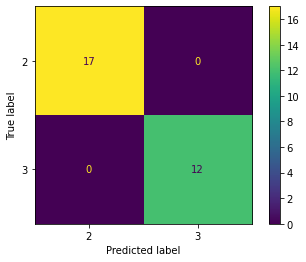

In [8]:
#Plotting confusion matrix
plot_confusion_matrix(model, x_seeds_test, y_seeds_test)

In [9]:
accuracy = accuracy_score(y_seeds_test, y_pred)
accuracy

1.0

In [10]:
cs_r = classification_report(y_seeds_test, y_pred)
print(cs_r)

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [12]:
plotting(x_seeds_test, y_seeds_test)

NameError: name 'cs' is not defined